In [1]:
from tdmclient import ClientAsync
from local_navigation import localNavigation
from global_navigation import GlobalNavigation

client = ClientAsync()
node = await client.wait_for_node()
await node.lock()

Node d39ca52c-6d75-449e-96ee-13586c1312f5

In [2]:
from Vision import Vision
import time
from motion_control import MotionControl
from robot_api import Thymio
from global_navigation import GlobalNavigation
import numpy as np

In [3]:
#create vision module object
visio = Vision()
visio.begin()

Caméra initialisée sur le port 0


no markers
(get_2_markers) Thymio and Goal markers not detected
Thymio not detected
Goal not detected
no markers
(get_2_markers) Thymio and Goal markers not detected
Thymio not detected
Goal not detected
no markers
(get_2_markers) Thymio and Goal markers not detected
Thymio not detected
Goal not detected
no markers
(get_2_markers) Thymio and Goal markers not detected
Thymio not detected
Goal not detected
no markers
(get_2_markers) Thymio and Goal markers not detected
Thymio not detected
Goal not detected
no markers
(get_2_markers) Thymio and Goal markers not detected
Thymio not detected
Goal not detected
no markers
(get_2_markers) Thymio and Goal markers not detected
Thymio not detected
Goal not detected
no markers
(get_2_markers) Thymio and Goal markers not detected
Thymio not detected
Goal not detected
no markers
(get_2_markers) Thymio and Goal markers not detected
Thymio not detected
Goal not detected
no markers
(get_2_markers) Thymio and Goal markers not detected
Thymio not detecte

In [ ]:
visio.stop() #stop the visio module

In [4]:
t, g, o = visio.get_thymio_goal_and_obstacles() #get the lists you need
print(o)
print(g)
print(t)

[[[265, 133], [202, 247], [201, 299], [365, 299], [377, 256], [333, 161]], [[365, 1], [419, 83], [473, 0]]]
[80.726166, 158.38336]
[481.73163, 239.17871, -1.9460671]


(get_2_markers) Goal not detected
Goal not detected
(get_2_markers) Goal not detected
Goal not detected
(get_2_markers) Goal not detected
Goal not detected
(get_2_markers) Goal not detected
Goal not detected
(get_2_markers) Goal not detected
Goal not detected
(get_2_markers) Goal not detected
Goal not detected
(get_2_markers) Goal not detected
Goal not detected
(get_2_markers) Goal not detected
Goal not detected
(get_2_markers) Goal not detected
Goal not detected
(get_2_markers) Goal not detected
Goal not detected
(get_2_markers) Goal not detected
Goal not detected
(get_2_markers) Goal not detected
Goal not detected
(get_2_markers) Goal not detected
Goal not detected
(get_2_markers) Goal not detected
Goal not detected
(get_2_markers) Goal not detected
Goal not detected
(get_2_markers) Goal not detected
Goal not detected
(get_2_markers) Goal not detected
Goal not detected
(get_2_markers) Goal not detected
Goal not detected
(get_2_markers) Goal not detected
Goal not detected
(get_2_marke

In [5]:
"""Point d'entrée principal"""
global_nav = GlobalNavigation()
Thymio = Thymio(node, client)
motion_control = MotionControl(Thymio)
local_navigation = localNavigation()



(get_2_markers) Goal not detected
Goal not detected
(get_2_markers) Goal not detected
Goal not detected
(get_2_markers) Goal not detected
Goal not detected
(get_2_markers) Goal not detected
Goal not detected
(get_2_markers) Goal not detected
Goal not detected
(get_2_markers) Goal not detected
Goal not detected
(get_2_markers) Goal not detected
Goal not detected
(get_2_markers) Goal not detected
Goal not detected
(get_2_markers) Goal not detected
Goal not detected
(get_2_markers) Goal not detected
Goal not detected
(get_2_markers) Goal not detected
Goal not detected
(get_2_markers) Goal not detected
Goal not detected
(get_2_markers) Goal not detected
Goal not detected
(get_2_markers) Goal not detected
Goal not detected
(get_2_markers) Goal not detected
Goal not detected
(get_2_markers) Goal not detected
Goal not detected
(get_2_markers) Goal not detected
Goal not detected
(get_2_markers) Goal not detected
Goal not detected
(get_2_markers) Goal not detected
Goal not detected
(get_2_marke

(get_2_markers) Goal not detected
Goal not detected


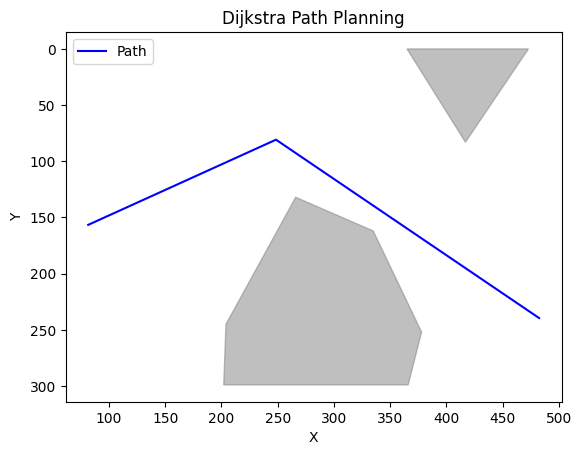

(get_2_markers) Goal not detected
Goal not detected
(get_2_markers) Goal not detected
Goal not detected
(get_2_markers) Goal not detected
Goal not detected
(get_2_markers) Goal not detected
Goal not detected
(get_2_markers) Goal not detected
Goal not detected
(get_2_markers) Goal not detected
Goal not detected
(get_2_markers) Goal not detected
Goal not detected
(get_2_markers) Goal not detected
Goal not detected
(get_2_markers) Goal not detected
Goal not detected


In [6]:
thymio, goal, obstacles = visio.get_thymio_goal_and_obstacles()

path, _, _ = global_nav.dijkstra(thymio, goal, obstacles)
visio.camera_feed.vision_module.path = path.copy()
if path:
    global_nav.plot_path(path, obstacles)
else:
    print("No valid path found. Cannot plot.")

In [7]:
print(path)

(find_marker_center_and_orientation) Division by 0 : returning tr instead of center


[(368.011474609375, 133.095703125), (247.03883763165405, 80.78365552291511), (78.99999237060547, 151.999755859375)]


(find_marker_center_and_orientation) Division by 0 : returning tr instead of center
(find_marker_center_and_orientation) Division by 0 : returning tr instead of center
(find_marker_center_and_orientation) Division by 0 : returning tr instead of center


In [7]:
path.pop(0)
goal_point = path[0]
glob_loc = 0
speed = [0,0]

try:
    while True:
        prox_horizontal = motion_control.read_prox_sensors()
        glob_loc = local_navigation.global_to_local(prox_horizontal, glob_loc)
        print(prox_horizontal)
        print(glob_loc)
       
        if(glob_loc == 0):
            glob_loc = local_navigation.global_to_local(prox_horizontal, glob_loc)
            if motion_control.path_tracking(thymio, goal_point):
                path.pop(0)
                if not path:
                    motion_control.set_motor_speed(0, 0)
                    break
                else:
                    goal_point = path[0]
            thymio, goal, obstacles = visio.get_thymio_goal_and_obstacles()
        if(glob_loc == 1):
            y = motion_control.get_motor_speed()
            speed = local_navigation.reactive_control(prox_horizontal, y)
            motion_control.set_motor_speed(speed[0], speed[1])
            glob_loc = local_navigation.global_to_local(prox_horizontal, glob_loc)
            if(glob_loc == 0):
                thymio, goal, obstacles = visio.get_thymio_goal_and_obstacles()
                path, _, _ = global_nav.dijkstra(thymio, goal, obstacles)
                visio.camera_feed.vision_module.path = path.copy()
                glob_loc = 0
                
    print("ARRIVED")



except KeyboardInterrupt:
    print("Stop the program")
finally:
    visio.stop()
    print("Program stops")

[0, 0, 0, 0, 0, 0, 0]
0
hi
1.9195673
2.545579626793835
0.6260122802209591
-2.545579626793835
2.545579626793835 31.300614011047955
[0, 0, 0, 0, 0, 0, 0]
0
hi
1.9195673
2.5443008680822286
0.6247335215093526
-2.5443008680822286
2.5443008680822286 31.236676075467628
[0, 0, 0, 0, 0, 0, 0]
0
hi
1.8925469
2.544869665119406
0.6523227729532683
-2.544869665119406
(get_2_markers) Goal not detected
Goal not detected
2.544869665119406 32.61613864766342
[0, 0, 0, 0, 0, 0, 0]
0
hi
1.8925469
2.5494306707023133
0.6568837785361756
-2.5494306707023133
2.5494306707023133 32.84418892680878
[0, 0, 0, 0, 0, 0, 0]
0
hi
1.9460671
2.5531364717091765
0.60706937690632
-2.5531364717091765
2.5531364717091765 30.353468845316
[0, 0, 0, 0, 0, 0, 0]
0
hi
1.9720252
2.556431643716895
0.5844064876957766
-2.556431643716895
(get_2_markers) Goal not detected


Exception in thread Thread-6:
Traceback (most recent call last):
  File "c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\threading.py", line 1075, in _bootstrap_inner
    self.run()
  File "c:\Users\User\MICRO452_Mobile_Robots\Vision.py", line 536, in run
    robot_pose= self.vision_module.detect_thymio_pose(Thymio_marker)  
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\User\MICRO452_Mobile_Robots\Vision.py", line 397, in detect_thymio_pose
    x,y,theta = self.find_marker_center_and_orientation(thymio_marker)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\User\MICRO452_Mobile_Robots\Vision.py", line 246, in find_marker_center_and_orientation
    tl,tr,br,bl = marker
    ^^^^^^^^^^^
ValueError: not enough values to unpack (expected 4, got 2)


2.556431643716895 29.22032438478883
[0, 0, 0, 0, 0, 0, 0]
0
hi
1.9832067
2.55957404906406
0.5763673001016576
-2.55957404906406
2.55957404906406 28.81836500508288
[0, 0, 0, 0, 0, 0, 0]
0
hi
1.9832067
2.55957404906406
0.5763673001016576
-2.55957404906406
2.55957404906406 28.81836500508288
[0, 0, 0, 0, 0, 0, 0]
0
hi
1.9832067
2.55957404906406
0.5763673001016576
-2.55957404906406
2.55957404906406 28.81836500508288
[0, 0, 0, 0, 0, 0, 0]
0
hi
1.9832067
2.55957404906406
0.5763673001016576
-2.55957404906406
2.55957404906406 28.81836500508288
[0, 0, 0, 0, 0, 0, 0]
0
hi
1.9832067
2.55957404906406
0.5763673001016576
-2.55957404906406
2.55957404906406 28.81836500508288
[0, 0, 0, 0, 0, 0, 0]
0
hi
1.9832067
2.55957404906406
0.5763673001016576
-2.55957404906406
2.55957404906406 28.81836500508288
[0, 0, 0, 0, 0, 0, 0]
0
hi
1.9832067
2.55957404906406
0.5763673001016576
-2.55957404906406
2.55957404906406 28.81836500508288
[0, 0, 0, 0, 0, 0, 0]
0
hi
1.9832067
2.55957404906406
0.5763673001016576
-2.559574

In [ ]:
motion_control.set_motor_speed(0, 0)
#test

In [7]:
prox_horizontal = motion_control.read_prox_sensors()
print(prox_horizontal)

[0, 0, 0, 0, 0, 0, 0]
